<a href="https://colab.research.google.com/github/datasocode/Analyse-de-Clustering-et-ACP/blob/main/Donne%CC%81es_et_De%CC%81cisions_Analyse_des_Marche%CC%81s_Potentiels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation des librairie, des données

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

* Meat_consumption (OECD DATA VIA KAGGLE)
* Consommation de la viande de volailles (FAO)
* Disponibilite Alimentaire_2017 (OC)
* Population_2000_2018 (OC)
* Political Stability (FAO)
* PIB (FAO)
* Prévalence de l'obésité chez l'adulte (18 ans ou plus)(FAO)
* Performance logistique (DATA BANK)
* Food price inflation

## La consommation de viande dans le monde

In [ ]:
Meat_consumption = pd.read_csv('Meat_consumption.csv', sep = ',')
Meat_consumption.head(2)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1990,0.000,NaN
1,AUS,MEATCONSUMP,BEEF,KG_CAP,A,1991,27.942,NaN


In [ ]:
# Sélectionner les données correspondant à l'année 2017

Meat_consumption = Meat_consumption.loc[Meat_consumption['TIME'] == 2017]
Meat_consumption.head(2)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
27,AUS,MEATCONSUMP,BEEF,KG_CAP,A,2017,21.251,NaN
67,AUS,MEATCONSUMP,PIG,KG_CAP,A,2017,22.062,NaN


In [ ]:
Meat = Meat_consumption.groupby('SUBJECT').sum().reset_index()
Meat

,SUBJECT,TIME,Value,Flag Codes
0,BEEF,153292,166422.712,0.0
1,PIG,153292,316437.195,0.0
2,POULTRY,153292,301598.818,0.0
3,SHEEP,153292,32782.996,0.0


In [ ]:
BEEF = (Meat.loc[Meat['SUBJECT'] == 'BEEF', 'Value'].values[0] / Meat['Value'].sum()) * 100
BEEF.round(2)

20.36

In [ ]:
PIG = (Meat.loc[Meat['SUBJECT'] == 'PIG', 'Value'].values[0] / Meat['Value'].sum()) * 100
PIG.round(2)

38.72

In [ ]:
POULTRY = (Meat.loc[Meat['SUBJECT'] == 'POULTRY', 'Value'].values[0] / Meat['Value'].sum()) * 100
POULTRY.round(2)

36.9

In [ ]:
SHEEP = (Meat.loc[Meat['SUBJECT'] == 'SHEEP', 'Value'].values[0] / Meat['Value'].sum()) * 100
SHEEP.round(2)

4.01

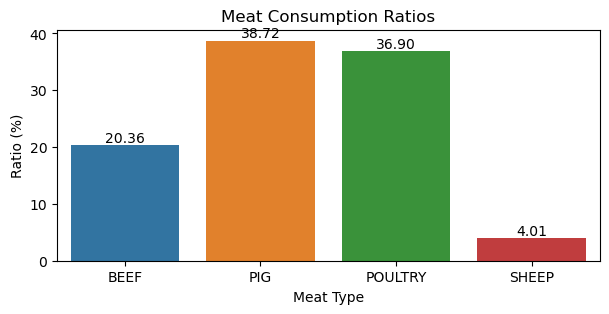

In [ ]:
labels = ['BEEF', 'PIG', 'POULTRY', 'SHEEP']
ratios = [BEEF, PIG, POULTRY, SHEEP]

fig, ax = plt.subplots(figsize=(7, 3))

ax = sns.barplot(x=labels, y=ratios)
ax.bar_label(ax.containers[0], fmt='%.2f')

plt.xlabel('Meat Type')
plt.ylabel('Ratio (%)')
plt.title('Meat Consumption Ratios')
plt.show()

<span style='color: blue;'>* Un résumé de la consommation de viande en pourcentage pour différents types de viande (bœuf, porc, volaille et mouton).</span>

<span style='color: blue;'>*  La première partie du code calcule les pourcentages de consommation pour chaque type de viande en utilisant la formule : (consommation de chaque type de viande / consommation totale de viande) * 100. </span>

<span style='color: blue;'>* Ensuite, une visualisation graphique est créée en utilisant la bibliothèque Seaborn. </span>

<span style='color: blue;'>* La volaille représente 36,9% de la consommation totale de viande. Cela montre que la volaille est également très populaire et largement consommée, se situant à un niveau similaire à la consommation de porc.</span>

# Nettoyage et exploration des données

### La consommation de viande de volaille a connu une croissance entre 2010 et 2017

In [ ]:
##. 2010-2017 consommation de la viande volailles dans le monde

Viande_Volailles = pd.read_csv('Viande_Volailles.csv', sep = ',')
Viande_Volailles.head(2)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),528,Pays-Bas (Royaume des),5142,Nourriture,F2734,Viande de Volailles,2010,2010,Milliers de tonnes,267,I,Valeur imputée
1,FBS,Bilans Alimentaires (2010-),528,Pays-Bas (Royaume des),5142,Nourriture,F2734,Viande de Volailles,2011,2011,Milliers de tonnes,206,I,Valeur imputée


In [ ]:
Viande_Volailles = Viande_Volailles.pivot(index='Zone', columns='Année', values='Valeur')
Viande_Volailles.head(2)

Année,2010,2011,2012,2013,2014,2015,2016,2017
Zone,,,,,,,,
Afghanistan,65.0,56.0,62.0,67.0,69.0,66.0,69.0,64.0
Afrique du Sud,1710.0,1810.0,1862.0,1978.0,2032.0,2037.0,2066.0,2110.0


In [ ]:
Viande_Volailles['+Conso(%)'] = round((Viande_Volailles[2017]-Viande_Volailles[2010])/(Viande_Volailles[2010])*100
                                      ,2)
Viande_Volailles.head(2)

Année,2010,2011,2012,2013,2014,2015,2016,2017,+Conso(%)
Zone,,,,,,,,,
Afghanistan,65.0,56.0,62.0,67.0,69.0,66.0,69.0,64.0,-1.54
Afrique du Sud,1710.0,1810.0,1862.0,1978.0,2032.0,2037.0,2066.0,2110.0,23.39


<span style='color: blue;'>* +Conso(%) : Ces valeurs indiqueraient comment la consommation de viande de volaille a évolué au fil du temps.<span>

In [ ]:
Viande_Volailles.sort_values('+Conso(%)', ascending=False).head(15)

Année,2010,2011,2012,2013,2014,2015,2016,2017,+Conso(%)
Zone,,,,,,,,,
Malawi,24.0,56.0,74.0,73.0,78.0,99.0,82.0,130.0,441.67
Kenya,27.0,21.0,23.0,37.0,44.0,43.0,40.0,107.0,296.30
Gambie,5.0,8.0,7.0,5.0,9.0,14.0,17.0,18.0,260.00
Congo,31.0,40.0,44.0,58.0,64.0,75.0,74.0,107.0,245.16
Népal,17.0,37.0,41.0,43.0,43.0,46.0,55.0,58.0,241.18
Djibouti,1.0,1.0,4.0,2.0,2.0,2.0,2.0,3.0,200.00
Libéria,23.0,32.0,34.0,38.0,47.0,51.0,55.0,63.0,173.91
Mozambique,52.0,56.0,62.0,68.0,85.0,100.0,104.0,115.0,121.15
Kiribati,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,100.00


In [ ]:
Croissance = Viande_Volailles.pivot_table(index='Zone', values='+Conso(%)').reset_index()
Croissance.head()

Année,Zone,+Conso(%)
0,Afghanistan,-1.54
1,Afrique du Sud,23.39
2,Albanie,-21.43
3,Algérie,9.16
4,Allemagne,3.40


In [ ]:
Croissance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Zone       178 non-null    object 
 1   +Conso(%)  178 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB


In [ ]:
# La moyenne de la croissance de la consommation mondiale de poulet de 2010 à 2017

round(Croissance['+Conso(%)'].mean(),2)

31.12

# Disponibilite Alimentaire_2017

In [ ]:
DisponibiliteAlimentaire_2017 = pd.read_csv('DisponibiliteAlimentaire_2017.csv', sep = ',')
DisponibiliteAlimentaire_2017.head(2)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées


In [ ]:
DisponibiliteAlimentaire_2017 = DisponibiliteAlimentaire_2017.replace("Pays-Bas", "Pays-Bas (Royaume des)")

In [ ]:
# Affichher uniquement les colonnes 'Zone','Élément','Produit','Valeur'

dispo_2017=DisponibiliteAlimentaire_2017.loc[:,['Zone','Élément','Produit','Valeur']]
dispo_2017.head()

,Zone,Élément,Produit,Valeur
0,Afghanistan,Production,Blé et produits,4281.0
1,Afghanistan,Importations - Quantité,Blé et produits,2302.0
2,Afghanistan,Variation de stock,Blé et produits,-119.0
3,Afghanistan,Exportations - Quantité,Blé et produits,0.0
4,Afghanistan,Disponibilité intérieure,Blé et produits,6701.0


In [ ]:
dispo_2017 = dispo_2017.loc[dispo_2017['Élément']=='Disponibilité intérieure']
dispo_2017.head(2)

,Zone,Élément,Produit,Valeur
4,Afghanistan,Disponibilité intérieure,Blé et produits,6701.0
17,Afghanistan,Disponibilité intérieure,Riz et produits,753.0


In [ ]:
disponibilite_interieure_par_pays = dispo_2017.groupby(['Zone','Produit'])['Valeur'].sum()
disponibilite_interieure_par_pays

Zone          Produit               
Afghanistan   Abats Comestible          53.0
              Agrumes, Autres           50.0
              Alcool, non Comestible     0.0
              Aliments pour enfants      4.0
              Ananas et produits         0.0
                                        ... 
Îles Salomon  Viande de Suides           3.0
              Viande de Volailles        3.0
              Viande, Autre              0.0
              Vin                        0.0
              Épices, Autres             0.0
Name: Valeur, Length: 15905, dtype: float64

In [ ]:
disponibilite_interieure_par_pays = disponibilite_interieure_par_pays.reset_index()
disponibilite_interieure_par_pays

,Zone,Produit,Valeur
0,Afghanistan,Abats Comestible,53.0
1,Afghanistan,"Agrumes, Autres",50.0
2,Afghanistan,"Alcool, non Comestible",0.0
3,Afghanistan,Aliments pour enfants,4.0
4,Afghanistan,Ananas et produits,0.0
...,...,...,...
15900,Îles Salomon,Viande de Suides,3.0
15901,Îles Salomon,Viande de Volailles,3.0
15902,Îles Salomon,"Viande, Autre",0.0
15903,Îles Salomon,Vin,0.0


In [ ]:
dispo_int = disponibilite_interieure_par_pays.groupby('Zone').sum()
dispo_int.reset_index().head()

,Zone,Valeur
0,Afghanistan,15139.0
1,Afrique du Sud,66840.0
2,Albanie,4879.0
3,Algérie,45365.0
4,Allemagne,174960.0


In [ ]:
# Conserver uniquement les données concernant le produit 'Viande de Volailles'

dispo_2017 = dispo_2017.loc[dispo_2017['Produit']== 'Viande de Volailles']
dispo_2017.head()

,Zone,Élément,Produit,Valeur
654,Afghanistan,Disponibilité intérieure,Viande de Volailles,57.0
1708,Afrique du Sud,Disponibilité intérieure,Viande de Volailles,2118.0
2717,Albanie,Disponibilité intérieure,Viande de Volailles,47.0
3776,Algérie,Disponibilité intérieure,Viande de Volailles,277.0
4877,Allemagne,Disponibilité intérieure,Viande de Volailles,1739.0


In [ ]:
# Une table pivotante est créée à partir du DataFrame dispo_2017, avec l'index défini sur la colonne 'Zone',
# les colonnes définies sur la colonne 'Élément' et les valeurs définies sur la colonne 'Valeur'.
# Le résultat est stocké dans le DataFrame volaille

volaille=dispo_2017.pivot_table(index='Zone',columns='Élément', values = 'Valeur')
volaille.head(2).reset_index()

Élément,Zone,Disponibilité intérieure
0,Afghanistan,57.0
1,Afrique du Sud,2118.0


In [ ]:
dispo_poulet = dispo_int.merge(volaille, on ='Zone' ,how='inner')
dispo_poulet.reset_index().head(2)

,Zone,Valeur,Disponibilité intérieure
0,Afghanistan,15139.0,57.0
1,Afrique du Sud,66840.0,2118.0


In [ ]:
# En calculant le pourcentage de la disponibilité intérieure de la volaille par rapport à la disponibilité totale.
# Les valeurs sont arrondies à deux décimales.

dispo_poulet['Dispo_volailles(%)'] = round(dispo_poulet['Disponibilité intérieure'] / dispo_poulet['Valeur'] * 100,
                                           2)
dispo_poulet_2017 = dispo_poulet.sort_values('Dispo_volailles(%)', ascending=False)
dispo_poulet_2017 = dispo_poulet_2017.reset_index()

In [ ]:
dispo_poulet_2017[['Zone','Dispo_volailles(%)']].head(2)

,Zone,Dispo_volailles(%)
0,Grenade,9.20
1,Trinité-et-Tobago,8.51


In [ ]:
dispo_poulet_2017.head(2)

,Zone,Valeur,Disponibilité intérieure,Dispo_volailles(%)
0,Grenade,87.0,8.0,9.20
1,Trinité-et-Tobago,893.0,76.0,8.51


In [ ]:
dispo_volaille = DisponibiliteAlimentaire_2017.loc[DisponibiliteAlimentaire_2017['Produit'] == 'Viande de Volailles']
dispo_volaille.head(2)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.0,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.0,S,Données standardisées


In [ ]:
dispo_2017 = dispo_volaille.pivot_table(index='Zone', columns='Élément', values='Valeur')
dispo_2017.reset_index(inplace=True)
dispo_2017.head(2)

Élément,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
1,Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0


In [ ]:
missing_percent = round(dispo_2017.isnull().mean() * 100,2)
missing_percent

# J'ai décidé de supprimer les variables qui ont un pourcentage élevé de données manquantes :
# Alimentation pour touristes
# Aliments pour animaux
# Autres utilisations (non alimentaires)
# Pertes
# Semences
# Traitement

Élément
Zone                                                              0.00
Alimentation pour touristes                                      54.65
Aliments pour animaux                                            99.42
Autres utilisations (non alimentaire)                            80.23
Disponibilité alimentaire (Kcal/personne/jour)                    0.00
Disponibilité alimentaire en quantité (kg/personne/an)            0.00
Disponibilité de matière grasse en quantité (g/personne/jour)     0.00
Disponibilité de protéines en quantité (g/personne/jour)          0.00
Disponibilité intérieure                                          1.16
Exportations - Quantité                                          21.51
Importations - Quantité                                           1.16
Nourriture                                                        1.16
Pertes                                                           61.05
Production                                                        2.3

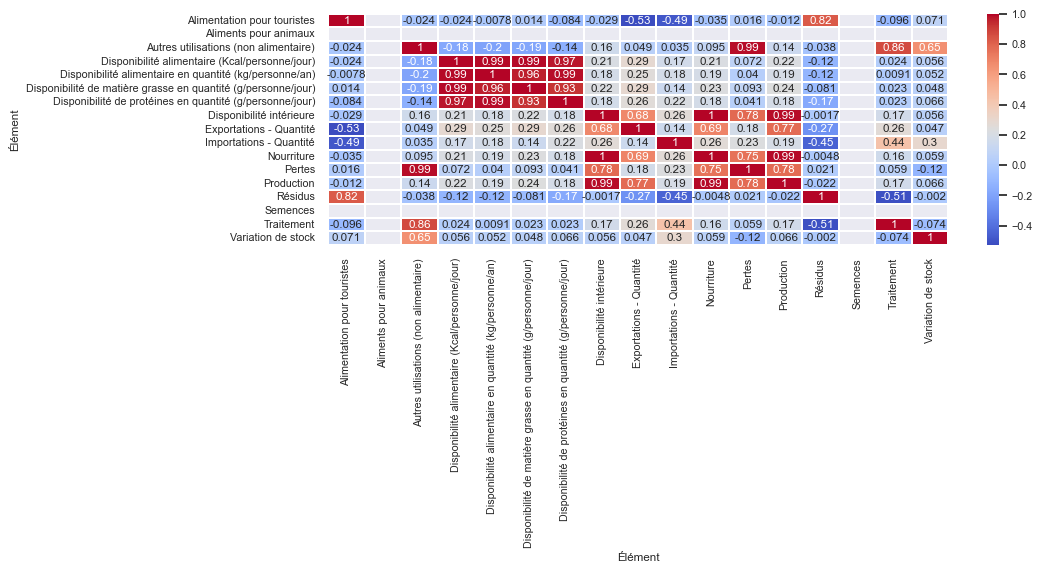

In [ ]:
sns.set(font_scale=0.7)
corrmat = dispo_2017.corr()
f, ax = plt.subplots(figsize=(10, 3))
sns.heatmap(corrmat, ax=ax, cmap="coolwarm", linewidths=0.1, annot=True);

In [ ]:
dispo = dispo_2017[['Zone','Disponibilité intérieure','Exportations - Quantité', 'Importations - Quantité',
                    'Nourriture', 'Production','Variation de stock']]
dispo.head(2)

Élément,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock
0,Afghanistan,57.0,NaN,29.0,55.0,28.0,0.0
1,Afrique du Sud,2118.0,63.0,514.0,2035.0,1667.0,0.0


In [ ]:
dispo.shape

(172, 7)

In [ ]:
dispo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone                      172 non-null    object 
 1   Disponibilité intérieure  170 non-null    float64
 2   Exportations - Quantité   135 non-null    float64
 3   Importations - Quantité   170 non-null    float64
 4   Nourriture                170 non-null    float64
 5   Production                168 non-null    float64
 6   Variation de stock        169 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.5+ KB


In [ ]:
missing_percent = round(dispo.isnull().mean() * 100,2)
missing_percent

Élément
Zone                         0.00
Disponibilité intérieure     1.16
Exportations - Quantité     21.51
Importations - Quantité      1.16
Nourriture                   1.16
Production                   2.33
Variation de stock           1.74
dtype: float64

<span style='color: blue;'> * L'exportation par pays, en utilisant les données de 2012 à 2016.<span>

* Collectez les données d'exportation par pays pour la période 2012-2016.
* Calculez la moyenne des exportations pour chaque pays sur cette période.
* Parcourez vos données et remplacez les valeurs nulles par la moyenne correspondante pour chaque pays.

In [ ]:
dispo_isnull = dispo[dispo['Exportations - Quantité'].isnull()]
dispo_isnull

Élément,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock
0,Afghanistan,57.0,NaN,29.0,55.0,28.0,0.0
13,Bahamas,26.0,NaN,24.0,16.0,6.0,4.0
14,Bangladesh,250.0,NaN,0.0,240.0,249.0,0.0
23,Burkina Faso,46.0,NaN,0.0,44.0,46.0,0.0
26,Cabo Verde,10.0,NaN,12.0,9.0,1.0,4.0
27,Cambodge,38.0,NaN,10.0,37.0,28.0,0.0
40,Cuba,342.0,NaN,312.0,269.0,29.0,-1.0
43,Djibouti,3.0,NaN,3.0,3.0,NaN,0.0
54,Gambie,8.0,NaN,16.0,8.0,2.0,10.0
56,Grenade,8.0,NaN,7.0,5.0,1.0,0.0


In [ ]:
export = pd.read_csv('Export_2012-2016.csv', sep = ',')
export.head(2)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),528,Pays-Bas (Royaume des),5911,Exportations - Quantité,F2734,Viande de Volailles,2012,2012,Milliers de tonnes,1170,I,Valeur imputée
1,FBS,Bilans Alimentaires (2010-),528,Pays-Bas (Royaume des),5911,Exportations - Quantité,F2734,Viande de Volailles,2013,2013,Milliers de tonnes,1138,I,Valeur imputée


In [ ]:
export = export.pivot(index='Zone', columns='Année', values='Valeur')
export.reset_index()

Année,Zone,2012,2013,2014,2015,2016
0,Afghanistan,NaN,NaN,0.0,0.0,NaN
1,Afrique du Sud,9.0,53.0,66.0,67.0,75.0
2,Albanie,0.0,0.0,NaN,NaN,0.0
3,Algérie,0.0,0.0,1.0,1.0,1.0
4,Allemagne,631.0,605.0,651.0,623.0,618.0
...,...,...,...,...,...,...
168,Émirats arabes unis,24.0,38.0,35.0,20.0,24.0
169,Équateur,0.0,0.0,0.0,0.0,NaN
170,États-Unis d'Amérique,4066.0,4086.0,4098.0,3419.0,3580.0
171,Éthiopie,0.0,0.0,0.0,0.0,0.0


In [ ]:
export.isnull().sum()

Année
2012    10
2013    11
2014    35
2015    30
2016    39
dtype: int64

In [ ]:
export_mean = pd.DataFrame(export)
export_mean = export_mean.apply(lambda x: x.fillna(x.mean()), axis=1)
export_mean.reset_index()

Année,Zone,2012,2013,2014,2015,2016
0,Afghanistan,0.0,0.0,0.0,0.0,0.0
1,Afrique du Sud,9.0,53.0,66.0,67.0,75.0
2,Albanie,0.0,0.0,0.0,0.0,0.0
3,Algérie,0.0,0.0,1.0,1.0,1.0
4,Allemagne,631.0,605.0,651.0,623.0,618.0
...,...,...,...,...,...,...
168,Émirats arabes unis,24.0,38.0,35.0,20.0,24.0
169,Équateur,0.0,0.0,0.0,0.0,0.0
170,États-Unis d'Amérique,4066.0,4086.0,4098.0,3419.0,3580.0
171,Éthiopie,0.0,0.0,0.0,0.0,0.0


In [ ]:
export_mean = export_mean.loc[:, "2012":"2016"].mean(axis=1)
export_mean = export_mean.groupby(export_mean.index).mean()
export_mean = pd.DataFrame(export_mean, columns=['Mean'])
export_mean.index.name = 'Zone'
export_mean.reset_index()

,Zone,Mean
0,Afghanistan,0.0
1,Afrique du Sud,54.0
2,Albanie,0.0
3,Algérie,0.6
4,Allemagne,625.6
...,...,...
168,Émirats arabes unis,28.2
169,Équateur,0.0
170,États-Unis d'Amérique,3849.8
171,Éthiopie,0.0


In [ ]:
dispo_isnull.merge(export_mean, on = 'Zone', how= 'inner')

,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock,Mean
0,Afghanistan,57.0,NaN,29.0,55.0,28.0,0.0,0.000000
1,Bahamas,26.0,NaN,24.0,16.0,6.0,4.0,0.000000
2,Bangladesh,250.0,NaN,0.0,240.0,249.0,0.0,0.000000
3,Burkina Faso,46.0,NaN,0.0,44.0,46.0,0.0,0.000000
4,Cabo Verde,10.0,NaN,12.0,9.0,1.0,4.0,0.000000
5,Cambodge,38.0,NaN,10.0,37.0,28.0,0.0,0.000000
6,Cuba,342.0,NaN,312.0,269.0,29.0,-1.0,0.000000
7,Djibouti,3.0,NaN,3.0,3.0,NaN,0.0,0.000000
8,Gambie,8.0,NaN,16.0,8.0,2.0,10.0,0.000000
9,Grenade,8.0,NaN,7.0,5.0,1.0,0.0,0.000000


In [ ]:
dispo['Exportations - Quantité'].fillna(0, inplace=True)
dispo.head()

/var/folders/62/rh3k63454234qh974djnz0xm0000gn/T/ipykernel_43022/1003122120.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dispo['Exportations - Quantité'].fillna(0, inplace=True)


Élément,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock
0,Afghanistan,57.0,0.0,29.0,55.0,28.0,0.0
1,Afrique du Sud,2118.0,63.0,514.0,2035.0,1667.0,0.0
2,Albanie,47.0,0.0,38.0,47.0,13.0,4.0
3,Algérie,277.0,0.0,2.0,264.0,275.0,0.0
4,Allemagne,1739.0,646.0,842.0,1609.0,1514.0,-29.0


In [ ]:
dispo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone                      172 non-null    object 
 1   Disponibilité intérieure  170 non-null    float64
 2   Exportations - Quantité   172 non-null    float64
 3   Importations - Quantité   170 non-null    float64
 4   Nourriture                170 non-null    float64
 5   Production                168 non-null    float64
 6   Variation de stock        169 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.5+ KB


In [ ]:
missing_values_rows = dispo[dispo[['Disponibilité intérieure', 'Importations - Quantité', 'Nourriture', 'Production']].isnull().any(axis=1)]
missing_values_rows

Élément,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,Variation de stock
43,Djibouti,3.0,0.0,3.0,3.0,NaN,0.0
92,Maldives,12.0,0.0,12.0,7.0,NaN,0.0
113,Ouzbékistan,NaN,0.0,NaN,NaN,NaN,NaN
130,République démocratique populaire lao,NaN,0.0,NaN,NaN,NaN,NaN


In [ ]:
dispo.loc[dispo['Zone']=='Djibouti', 'Production'] = 3.0

dispo.loc[dispo['Zone']=='Maldives', 'Production'] = 7.0

dispo.loc[dispo['Zone']=='Ouzbékistan', 'Disponibilité intérieure'] = 61.0
dispo.loc[dispo['Zone']=='Ouzbékistan', 'Importations - Quantité'] = 61.0
dispo.loc[dispo['Zone']=='Ouzbékistan', 'Nourriture'] = 48.8
dispo.loc[dispo['Zone']=='Ouzbékistan', 'Production'] = 61.0

dispo.loc[dispo['Zone']=='République démocratique populaire lao', 'Disponibilité intérieure'] = 30.4
dispo.loc[dispo['Zone']=='République démocratique populaire lao', 'Importations - Quantité'] = 30.4
dispo.loc[dispo['Zone']=='République démocratique populaire lao', 'Nourriture'] = 29.8
dispo.loc[dispo['Zone']=='République démocratique populaire lao', 'Production'] = 30.4

In [ ]:
dispo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone                      172 non-null    object 
 1   Disponibilité intérieure  172 non-null    float64
 2   Exportations - Quantité   172 non-null    float64
 3   Importations - Quantité   172 non-null    float64
 4   Nourriture                172 non-null    float64
 5   Production                172 non-null    float64
 6   Variation de stock        169 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.5+ KB


<span style='color: blue;'> * Taux de dépendance aux importations (TDI) = (Importation ÷ Disponibilité intérieure) x 100<span>

<span style='color: blue;'> * Taux d'auto-suffisance (TAS) = (Production ÷ Disponibilité intérieure) x 100<span>

<span style='color: blue;'> * Disponibilité intérieure = Importations_Quantité + Production + Variation de stock - Exportations_Quantité<span>

<span style='color: blue;'> * = Aliments pour animaux + Autres utilisations + Nourriture + Pertes + Semences + Traitement<span>

In [ ]:
# calculer dans 2 nouvelles variables le TDI et le TAS

dispo = dispo[['Zone', 'Disponibilité intérieure','Exportations - Quantité', 'Importations - Quantité',
               'Nourriture', 'Production']].copy()
dispo['TDI (%)'] = round((dispo['Importations - Quantité'] / dispo['Disponibilité intérieure']) * 100, 2)
dispo['TAS (%)'] = round((dispo['Production'] / dispo['Disponibilité intérieure']) * 100, 2)
dispo.head(2)

Élément,Zone,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,TDI (%),TAS (%)
0,Afghanistan,57.0,0.0,29.0,55.0,28.0,50.88,49.12
1,Afrique du Sud,2118.0,63.0,514.0,2035.0,1667.0,24.27,78.71


In [ ]:
dispo = dispo_poulet_2017.merge(dispo, on='Zone', how='outer')
dispo.head(2)

,Zone,Valeur,Disponibilité intérieure_x,Dispo_volailles(%),Disponibilité intérieure_y,Exportations - Quantité,Importations - Quantité,Nourriture,Production,TDI (%),TAS (%)
0,Grenade,87.0,8.0,9.20,8.0,0.0,7.0,5.0,1.0,87.50,12.50
1,Trinité-et-Tobago,893.0,76.0,8.51,76.0,0.0,23.0,75.0,61.0,30.26,80.26


In [ ]:
dispo.rename(columns={'Disponibilité intérieure_x': 'Disponibilité intérieure'}, inplace=True)

In [ ]:
dispo = dispo[['Zone', 'Disponibilité intérieure','Dispo_volailles(%)','Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Production','TDI (%)','TAS (%)']]
dispo.head(2)

,Zone,Disponibilité intérieure,Dispo_volailles(%),Exportations - Quantité,Importations - Quantité,Nourriture,Production,TDI (%),TAS (%)
0,Grenade,8.0,9.20,0.0,7.0,5.0,1.0,87.50,12.50
1,Trinité-et-Tobago,76.0,8.51,0.0,23.0,75.0,61.0,30.26,80.26


In [ ]:
dispo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone                      172 non-null    object 
 1   Disponibilité intérieure  170 non-null    float64
 2   Dispo_volailles(%)        170 non-null    float64
 3   Exportations - Quantité   172 non-null    float64
 4   Importations - Quantité   172 non-null    float64
 5   Nourriture                172 non-null    float64
 6   Production                172 non-null    float64
 7   TDI (%)                   172 non-null    float64
 8   TAS (%)                   172 non-null    float64
dtypes: float64(8), object(1)
memory usage: 13.4+ KB


In [ ]:
rows = dispo[dispo['Disponibilité intérieure'].isnull()]
rows

,Zone,Disponibilité intérieure,Dispo_volailles(%),Exportations - Quantité,Importations - Quantité,Nourriture,Production,TDI (%),TAS (%)
170,Ouzbékistan,NaN,NaN,0.0,61.0,48.8,61.0,100.0,100.0
171,République démocratique populaire lao,NaN,NaN,0.0,30.4,29.8,30.4,100.0,100.0


In [ ]:
dispo.loc[dispo['Zone']=='Ouzbékistan', 'Disponibilité intérieure'] = 61.0
dispo.loc[dispo['Zone']=='République démocratique populaire lao', 'Disponibilité intérieure'] = 30.4

In [ ]:
dispo.loc[dispo['Zone']=='Ouzbékistan', 'Dispo_volailles(%)'] =0.14
dispo.loc[dispo['Zone']=='République démocratique populaire lao', 'Dispo_volailles(%)'] = 0.2

In [ ]:
dispo.shape

(172, 9)

In [ ]:
Croissance.shape

(178, 2)

In [ ]:
dispo = dispo.merge(Croissance, on = 'Zone', how = 'outer')
dispo.head(2)

,Zone,Disponibilité intérieure,Dispo_volailles(%),Exportations - Quantité,Importations - Quantité,Nourriture,Production,TDI (%),TAS (%),+Conso(%)
0,Grenade,8.0,9.20,0.0,7.0,5.0,1.0,87.50,12.50,25.00
1,Trinité-et-Tobago,76.0,8.51,0.0,23.0,75.0,61.0,30.26,80.26,6.17


In [ ]:
dispo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 178
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone                      179 non-null    object 
 1   Disponibilité intérieure  172 non-null    float64
 2   Dispo_volailles(%)        172 non-null    float64
 3   Exportations - Quantité   172 non-null    float64
 4   Importations - Quantité   172 non-null    float64
 5   Nourriture                172 non-null    float64
 6   Production                172 non-null    float64
 7   TDI (%)                   172 non-null    float64
 8   TAS (%)                   172 non-null    float64
 9   +Conso(%)                 178 non-null    float64
dtypes: float64(9), object(1)
memory usage: 15.4+ KB


In [ ]:
nan_dispo = dispo[dispo.isnull().any(axis=1)]
nan_dispo

,Zone,Disponibilité intérieure,Dispo_volailles(%),Exportations - Quantité,Importations - Quantité,Nourriture,Production,TDI (%),TAS (%),+Conso(%)
159,Soudan,69.0,0.22,0.0,2.0,65.0,67.0,2.9,97.1,NaN
172,Chine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.33
173,Comores,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44
174,Libye,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.46
175,Papouasie-Nouvelle-Guinée,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.29
176,République arabe syrienne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-30.32
177,République démocratique du Congo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.63
178,Seychelles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33


In [ ]:
dispo = dispo.dropna()
dispo.shape

(171, 10)

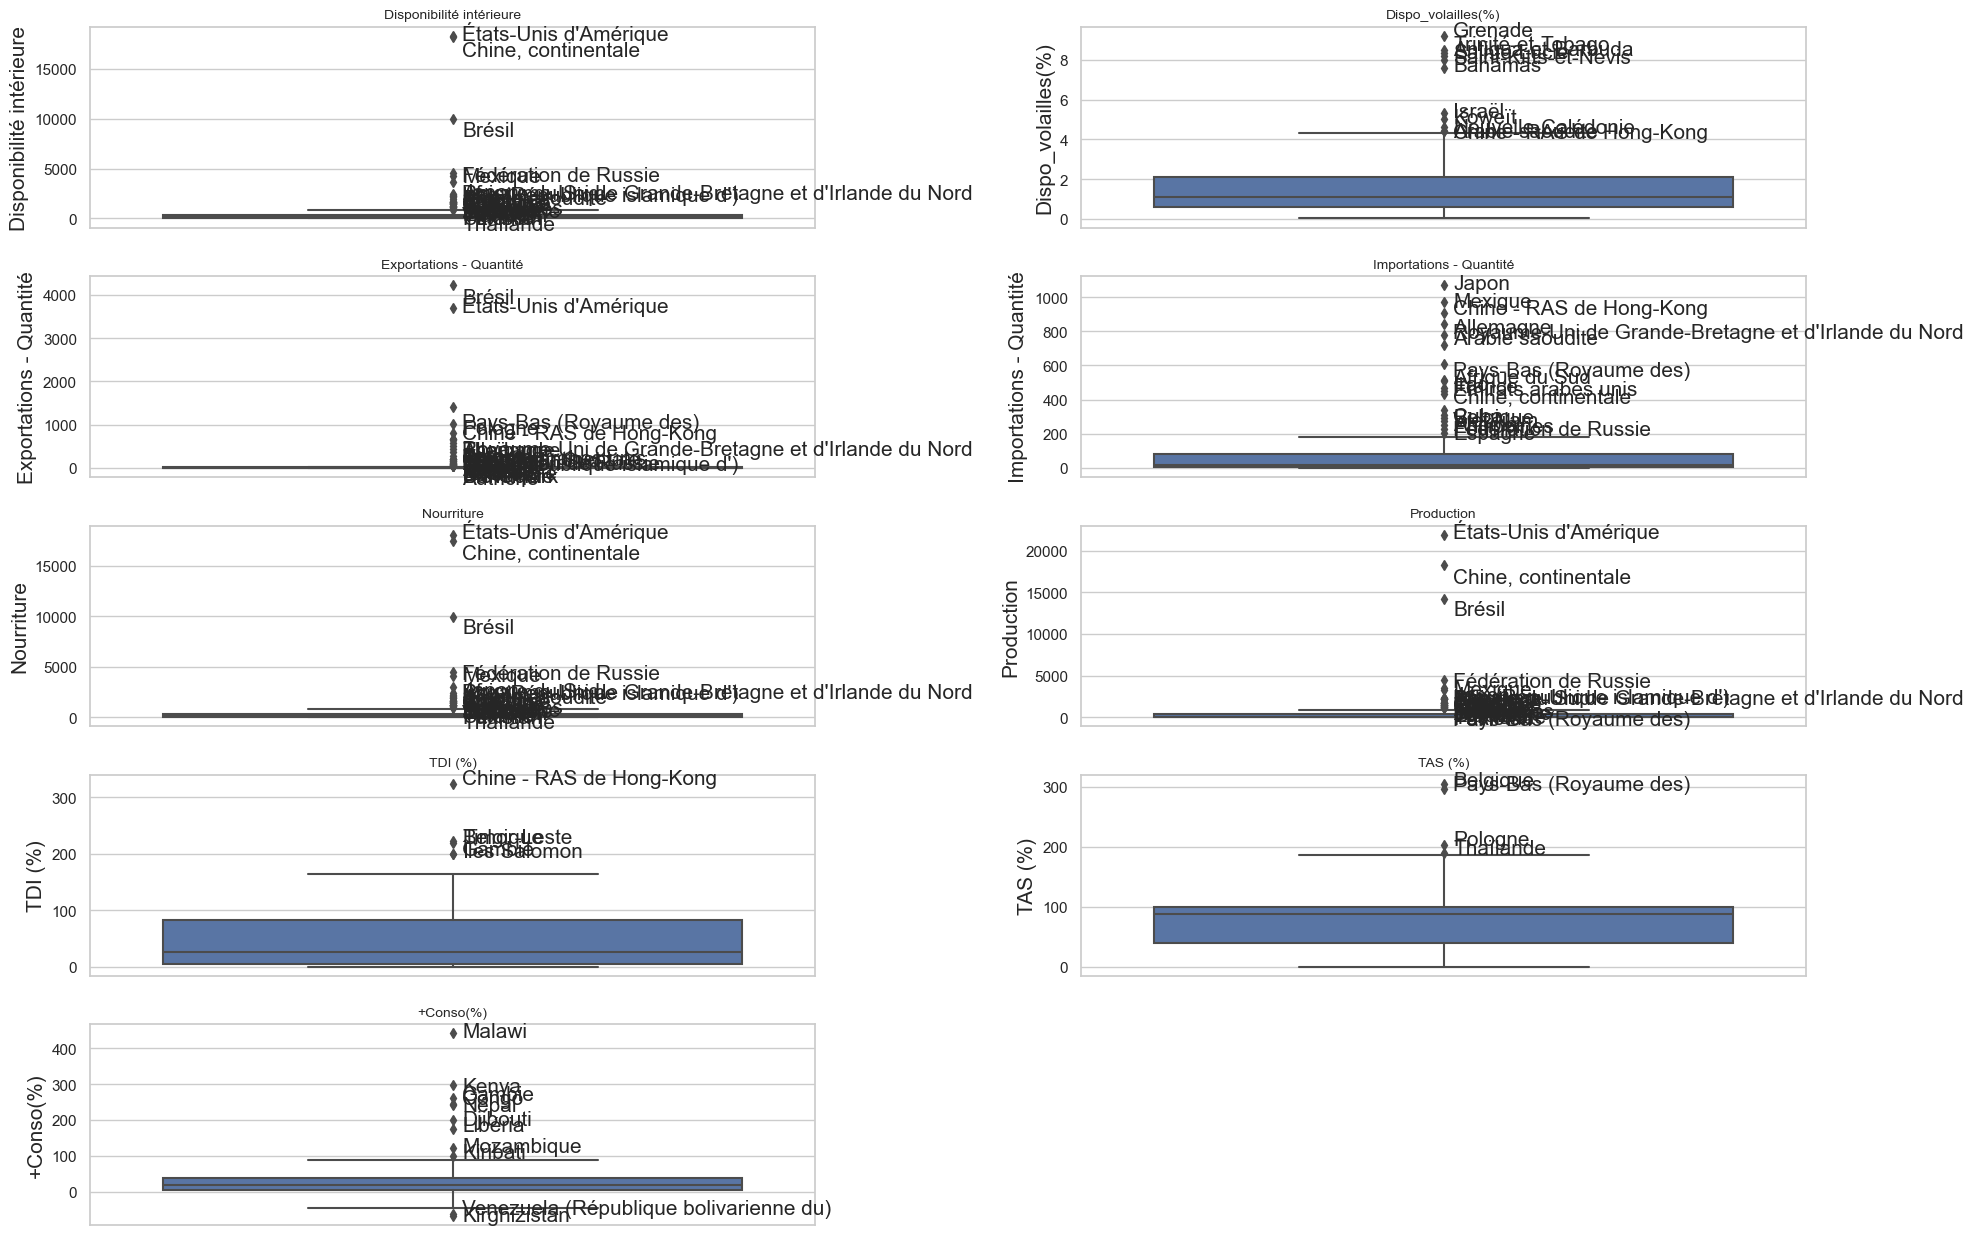

In [ ]:
columns = ['Disponibilité intérieure', 'Dispo_volailles(%)', 'Exportations - Quantité',
           'Importations - Quantité', 'Nourriture', 'Production', 'TDI (%)', 'TAS (%)','+Conso(%)']

plt.figure(figsize=(20, 20))
sns.set(style="whitegrid")

outliers_by_column = {}  # Initialiser le dictionnaire des valeurs aberrantes

for i, column in enumerate(columns, 1):
    plt.subplot(8, 2, i)
    sns.boxplot(data=dispo, y=column)
    plt.ylabel(column, fontsize=15)
    plt.xticks(fontsize=8)
    plt.title(column, fontsize=10)

    # Identifier les valeurs aberrantes
    q1 = dispo[column].quantile(0.25)
    q3 = dispo[column].quantile(0.75)
    iqr = q3 - q1
    lower_threshold = q1 - 1.5 * iqr
    upper_threshold = q3 + 1.5 * iqr
    outliers = dispo[(dispo[column] < lower_threshold) | (dispo[column] > upper_threshold)]

    # Ajouter les valeurs aberrantes au dictionnaire
    outliers_by_column[column] = outliers

    # Ajouter les étiquettes "Zone" aux valeurs aberrantes
    for j, outlier in enumerate(outliers['Zone']):
        plt.annotate(outlier, (0, dispo.loc[dispo['Zone'] == outlier, column].values[0]),
                     xytext=(7, -j*0.5), textcoords='offset points',
                     fontsize=15, ha='left')

plt.tight_layout()
plt.show()

In [ ]:
# Afficher les valeurs aberrantes par colonne sous forme de DataFrame
for column, outliers in outliers_by_column.items():
    print(f"Colonnes: {column}")
    sorted_outliers = outliers.sort_values(column, ascending=False)
    display(sorted_outliers[['Zone', column]])
    print("\n")


Colonnes: Disponibilité intérieure


,Zone,Disponibilité intérieure
41,États-Unis d'Amérique,18266.0
119,"Chine, continentale",18161.0
111,Brésil,9982.0
55,Fédération de Russie,4556.0
43,Mexique,4219.0
149,Inde,3661.0
39,Japon,2415.0
132,Indonésie,2323.0
38,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2234.0
42,Iran (République islamique d'),2220.0




Colonnes: Dispo_volailles(%)


,Zone,Dispo_volailles(%)
0,Grenade,9.20
1,Trinité-et-Tobago,8.51
2,Antigua-et-Barbuda,8.33
3,Sainte-Lucie,8.21
4,Saint-Kitts-et-Nevis,8.00
5,Bahamas,7.60
6,Israël,5.32
7,Koweït,5.05
8,Nouvelle-Calédonie,4.62
9,Arabie saoudite,4.43




Colonnes: Exportations - Quantité


,Zone,Exportations - Quantité
111,Brésil,4223.0
41,États-Unis d'Amérique,3692.0
122,Pays-Bas (Royaume des),1418.0
68,Pologne,1025.0
136,Thaïlande,796.0
10,Chine - RAS de Hong-Kong,663.0
137,Belgique,656.0
103,Allemagne,646.0
119,"Chine, continentale",576.0
110,France,501.0




Colonnes: Importations - Quantité


,Zone,Importations - Quantité
39,Japon,1069.0
43,Mexique,972.0
10,Chine - RAS de Hong-Kong,907.0
103,Allemagne,842.0
38,Royaume-Uni de Grande-Bretagne et d'Irlande du...,779.0
9,Arabie saoudite,722.0
122,Pays-Bas (Royaume des),608.0
24,Afrique du Sud,514.0
110,France,506.0
23,Iraq,470.0




Colonnes: Nourriture


,Zone,Nourriture
41,États-Unis d'Amérique,18100.0
119,"Chine, continentale",17518.0
111,Brésil,9982.0
55,Fédération de Russie,4509.0
43,Mexique,4058.0
149,Inde,2965.0
39,Japon,2359.0
42,Iran (République islamique d'),2220.0
38,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2131.0
24,Afrique du Sud,2035.0




Colonnes: Production


,Zone,Production
41,États-Unis d'Amérique,21914.0
119,"Chine, continentale",18236.0
111,Brésil,14201.0
55,Fédération de Russie,4444.0
149,Inde,3545.0
43,Mexique,3249.0
68,Pologne,2351.0
132,Indonésie,2301.0
39,Japon,2215.0
84,Turquie,2192.0




Colonnes: TDI (%)


,Zone,TDI (%)
10,Chine - RAS de Hong-Kong,323.93
137,Belgique,222.37
109,Timor-Leste,220.00
123,Gambie,200.00
150,Îles Salomon,200.00




Colonnes: TAS (%)


,Zone,TAS (%)
137,Belgique,304.61
122,Pays-Bas (Royaume des),295.70
68,Pologne,203.37
136,Thaïlande,190.24




Colonnes: +Conso(%)


,Zone,+Conso(%)
145,Malawi,441.67
165,Kenya,296.30
123,Gambie,260.00
34,Congo,245.16
160,Népal,241.18
158,Djibouti,200.00
44,Libéria,173.91
131,Mozambique,121.15
124,Kiribati,100.00
27,Venezuela (République bolivarienne du),-62.00


In [ ]:
dispo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 171
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone                      171 non-null    object 
 1   Disponibilité intérieure  171 non-null    float64
 2   Dispo_volailles(%)        171 non-null    float64
 3   Exportations - Quantité   171 non-null    float64
 4   Importations - Quantité   171 non-null    float64
 5   Nourriture                171 non-null    float64
 6   Production                171 non-null    float64
 7   TDI (%)                   171 non-null    float64
 8   TAS (%)                   171 non-null    float64
 9   +Conso(%)                 171 non-null    float64
dtypes: float64(9), object(1)
memory usage: 14.7+ KB


In [ ]:
dispo.describe()

,Disponibilité intérieure,Dispo_volailles(%),Exportations - Quantité,Importations - Quantité,Nourriture,Production,TDI (%),TAS (%),+Conso(%)
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,683.704094,1.687544,104.356725,89.528655,653.284211,712.669006,46.688538,78.180409,31.197602
std,2181.334738,1.717660,459.342082,186.067179,2130.819207,2481.067451,51.918947,48.686525,57.825408
min,2.000000,0.030000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-67.800000
25%,30.200000,0.615000,0.000000,3.000000,28.900000,13.000000,4.550000,40.000000,3.435000
50%,98.000000,1.130000,0.000000,16.000000,98.000000,65.000000,26.320000,88.240000,19.610000
75%,364.500000,2.120000,12.000000,80.500000,359.500000,376.500000,82.430000,100.000000,38.625000
max,18266.000000,9.200000,4223.000000,1069.000000,18100.000000,21914.000000,323.930000,304.610000,441.670000


# Population_2000_2018

In [ ]:
Population_2000_2018 = pd.read_csv('Population_2000_2018.csv', sep = ',')
Population_2000_2018.head(2)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN


In [ ]:
population = Population_2000_2018.pivot(index='Zone', columns='Année', values='Valeur')
population.head(2)

Année,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Zone,,,,,,,,,,,,,,,,,,,
Afghanistan,20779.953,21606.988,22600.770,23680.871,24726.684,25654.277,26433.049,27100.536,27722.276,28394.813,29185.507,30117.413,31161.376,32269.589,33370.794,34413.603,35383.032,36296.113,37171.921
Afrique du Sud,44967.708,45571.274,46150.913,46719.196,47291.610,47880.601,48489.459,49119.759,49779.471,50477.011,51216.964,52003.755,52832.658,53687.121,54544.186,55386.367,56207.646,57009.756,57792.518


In [ ]:
population['+Population(%)'] = round((population[2017]-population[2012])/(population[2012])*100,2)
population.head(2)

Année,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,+Population(%)
Zone,,,,,,,,,,,,,,,,,,,,
Afghanistan,20779.953,21606.988,22600.770,23680.871,24726.684,25654.277,26433.049,27100.536,27722.276,28394.813,29185.507,30117.413,31161.376,32269.589,33370.794,34413.603,35383.032,36296.113,37171.921,16.48
Afrique du Sud,44967.708,45571.274,46150.913,46719.196,47291.610,47880.601,48489.459,49119.759,49779.471,50477.011,51216.964,52003.755,52832.658,53687.121,54544.186,55386.367,56207.646,57009.756,57792.518,7.91


In [ ]:
population = population.loc[:, [2012, 2013, 2014, 2015, 2016, 2017, '+Population(%)']]
population

Année,2012,2013,2014,2015,2016,2017,+Population(%)
Zone,,,,,,,
Afghanistan,31161.376,32269.589,33370.794,34413.603,35383.032,36296.113,16.48
Afrique du Sud,52832.658,53687.121,54544.186,55386.367,56207.646,57009.756,7.91
Albanie,2914.096,2903.790,2896.305,2890.513,2886.438,2884.169,-1.03
Algérie,37383.895,38140.133,38923.692,39728.025,40551.392,41389.189,10.71
Allemagne,80972.628,81174.367,81450.378,81787.411,82193.768,82658.409,2.08
...,...,...,...,...,...,...,...
Îles Salomon,556.063,571.336,587.079,603.118,619.438,636.039,14.38
Îles Turques-et-Caïques,34.066,34.731,35.369,35.981,36.559,37.115,8.95
Îles Vierges américaines,105.534,105.303,105.114,104.958,104.835,104.751,-0.74


In [ ]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, Afghanistan to Îles Wallis-et-Futuna
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   2012            236 non-null    float64
 1   2013            236 non-null    float64
 2   2014            236 non-null    float64
 3   2015            236 non-null    float64
 4   2016            236 non-null    float64
 5   2017            236 non-null    float64
 6   +Population(%)  236 non-null    float64
dtypes: float64(7)
memory usage: 14.9+ KB


In [ ]:
pop_2017 = population.reset_index()
pop_2017.head(2)

Année,Zone,2012,2013,2014,2015,2016,2017,+Population(%)
0,Afghanistan,31161.376,32269.589,33370.794,34413.603,35383.032,36296.113,16.48
1,Afrique du Sud,52832.658,53687.121,54544.186,55386.367,56207.646,57009.756,7.91


In [ ]:
nan_values = pop_2017[pop_2017['+Population(%)'].isnull()]
nan_values

Année,Zone,2012,2013,2014,2015,2016,2017,+Population(%)
182,Serbie-et-Monténégro,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,Soudan (ex),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pop = pop_2017[['Zone','+Population(%)']]
pop.head(2)

Année,Zone,+Population(%)
0,Afghanistan,16.48
1,Afrique du Sud,7.91


In [ ]:
rows_pop= pop[pop.isnull().any(axis=1)]
rows_pop

Année,Zone,+Population(%)
182,Serbie-et-Monténégro,NaN
191,Soudan (ex),NaN


In [ ]:
pop = pop.dropna()
pop.shape

(236, 2)

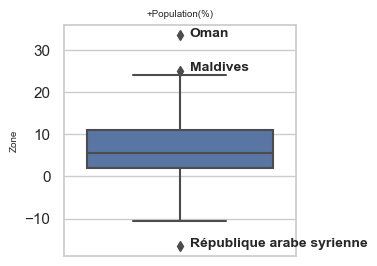

In [ ]:
plt.figure(figsize=(3, 3))
sns.boxplot(data=pop, y='+Population(%)')
plt.ylabel('Zone', fontsize=7)
plt.xticks(fontsize=10)
plt.title('+Population(%)', fontsize=7)

# Identifier les valeurs aberrantes
q1 = pop['+Population(%)'].quantile(0.25)
q3 = pop['+Population(%)'].quantile(0.75)
iqr = q3 - q1
lower_threshold = q1 - 1.5 * iqr
upper_threshold = q3 + 1.5 * iqr
outliers = pop[(pop['+Population(%)'] < lower_threshold) | (pop['+Population(%)'] > upper_threshold)]

# Ajouter les étiquettes "Zone" aux valeurs aberrantes
for j, outlier in enumerate(outliers['Zone']):
    plt.annotate(outlier, (0, pop.loc[pop['Zone'] == outlier, '+Population(%)'].values[0]),
                 xytext=(7, -j*0.5), textcoords='offset points',
                 fontsize=10, fontweight='bold', ha='left')

plt.show()

# PIB

In [ ]:
pib_2017 = pd.read_csv('PIB_par_habitant.csv', sep = ',')
pib_2017.head(2)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2012,2012,I$,2075.5,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,4,Afghanistan,6126,Valeur,22013,"PIB par habitant, ($ PPA internationaux consta...",2013,2013,I$,2116.5,X,Ciffre de sources internationales,NaN


In [ ]:
pib_2017 = pib_2017.pivot(index='Zone', columns='Année', values='Valeur')
pib_2017.head(2)

Année,2012,2013,2014,2015,2016,2017
Zone,,,,,,
Afghanistan,2075.5,2116.5,2102.4,2068.3,2057.1,2058.4
Afrique du Sud,13946.9,14066.1,14040.8,14010.1,13897.1,13860.3


In [ ]:
pib_2017=pib_2017.reset_index()
pib_2017

Année,Zone,2012,2013,2014,2015,2016,2017
0,Afghanistan,2075.5,2116.5,2102.4,2068.3,2057.1,2058.4
1,Afrique du Sud,13946.9,14066.1,14040.8,14010.1,13897.1,13860.3
2,Albanie,11228.0,11361.3,11586.8,11878.5,12291.9,12771.0
3,Algérie,11233.5,11319.1,11512.7,11697.0,11826.2,11737.4
4,Allemagne,49872.4,49954.2,50845.5,51159.3,51879.7,53071.5
...,...,...,...,...,...,...,...
182,Équateur,11431.4,11818.6,12078.5,11896.4,11551.6,11617.9
183,États-Unis d'Amérique,55796.0,56431.3,57300.6,58419.7,58965.0,59914.8
184,Éthiopie,1437.4,1545.2,1656.6,1779.1,1894.9,2021.6
185,Îles Marshall,3469.1,3594.5,3544.8,3585.6,3615.2,3711.4


In [ ]:
pib_2017.loc[pib_2017['Zone'] == 'Djibouti', 2012] = 4031.2
pib_2017.loc[pib_2017['Zone'] == 'Somalie', 2012] = 877.3

In [ ]:
pib_2017['PIB Valeur(%)'] = round((pib_2017[2017]-pib_2017[2012])/(pib_2017[2012])*100,2)
pib_2017.head(2)

Année,Zone,2012,2013,2014,2015,2016,2017,PIB Valeur(%)
0,Afghanistan,2075.5,2116.5,2102.4,2068.3,2057.1,2058.4,-0.82
1,Afrique du Sud,13946.9,14066.1,14040.8,14010.1,13897.1,13860.3,-0.62


In [ ]:
pib_2017.describe()

Année,2012,2013,2014,2015,2016,2017,PIB Valeur(%)
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,19664.442781,19903.473797,20111.926738,20239.004813,20489.293583,20925.340642,9.741925
std,21952.692930,22358.612361,22202.982172,21470.975435,21598.803175,22086.259174,12.942774
min,862.700000,824.900000,822.600000,825.200000,794.600000,773.600000,-38.510000
25%,4145.250000,4293.250000,4448.000000,4557.500000,4659.400000,4862.700000,2.955000
50%,11257.800000,11724.000000,12144.200000,12569.100000,12929.300000,13102.100000,9.520000
75%,26904.750000,26552.000000,27337.300000,28286.900000,28229.100000,29087.350000,17.280000
max,149702.000000,161972.000000,155202.000000,119407.000000,116520.000000,126144.000000,60.370000


In [ ]:
pib_2017.isnull().sum()

Année
Zone             0
2012             0
2013             0
2014             0
2015             0
2016             0
2017             0
PIB Valeur(%)    0
dtype: int64

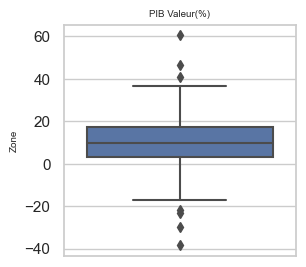

In [ ]:
plt.figure(figsize=(3, 3))
sns.boxplot(data=pib_2017, y='PIB Valeur(%)')
plt.ylabel('Zone', fontsize=7)
plt.xticks(fontsize=10)
plt.title('PIB Valeur(%)', fontsize=7)
plt.show()

In [ ]:
from scipy.stats import zscore

PIB_par_habitant_outliers = pd.DataFrame(pib_2017)

def detect_outliers(column):
    z_scores = zscore(column)
    outliers = column[(z_scores < -2) | (z_scores > 2)]
    return outliers

outliers = detect_outliers(pib_2017['PIB Valeur(%)'])

outliers_df = PIB_par_habitant_outliers.loc[pib_2017['PIB Valeur(%)'].isin(outliers)]
outliers_df

Année,Zone,2012,2013,2014,2015,2016,2017,PIB Valeur(%)
36,Chine,10642.4,11383.0,12132.5,12879.9,13666.8,14520.8,36.44
42,Congo,5504.2,5331.9,5552.8,5224.3,4544.1,4234.7,-23.06
64,Guinée équatoriale,36671.4,33678.7,32436.6,28313.4,24827.0,22551.0,-38.51
75,Irlande,53045.7,53435.6,57668.8,71508.7,72150.0,77749.2,46.57
86,Koweït,61417.0,58995.4,56647.4,54834.4,54709.0,50855.6,-17.20
90,Libye,30083.5,24534.0,18757.0,18435.8,17954.4,23468.0,-21.99
109,Myanmar,3113.0,3330.5,3574.0,3663.1,4020.2,4224.5,35.71
111,Nauru,8090.0,10491.9,13174.3,13550.3,13900.3,12973.8,60.37
137,République centrafricaine,1300.3,824.9,822.6,852.7,884.5,912.8,-29.80
184,Éthiopie,1437.4,1545.2,1656.6,1779.1,1894.9,2021.6,40.64


# Political Stability

In [ ]:
PoliticalStability_2017 = pd.read_csv('Stability_2017.csv', sep = ',')
PoliticalStability_2017.head(2)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales,NaN


In [ ]:
PoliticalStability_2017.rename(columns={'Valeur': 'Political_Valeur'}, inplace=True)
PoliticalStability_2017.head(2)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Political_Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,4,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,710,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales,NaN


In [ ]:
PoliticalStability_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            197 non-null    object 
 1   Domaine                 197 non-null    object 
 2   Code zone (M49)         197 non-null    int64  
 3   Zone                    197 non-null    object 
 4   Code Élément            197 non-null    int64  
 5   Élément                 197 non-null    object 
 6   Code Produit            197 non-null    int64  
 7   Produit                 197 non-null    object 
 8   Code année              197 non-null    int64  
 9   Année                   197 non-null    int64  
 10  Unité                   197 non-null    object 
 11  Political_Valeur        197 non-null    float64
 12  Symbole                 197 non-null    object 
 13  Description du Symbole  197 non-null    object 
 14  Note                    0 non-null      fl

In [ ]:
ps = PoliticalStability_2017[['Zone','Political_Valeur']]
ps.head(2)

,Zone,Political_Valeur
0,Afghanistan,-2.80
1,Afrique du Sud,-0.28


In [ ]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Zone              197 non-null    object 
 1   Political_Valeur  197 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


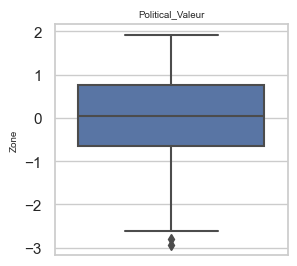

In [ ]:
plt.figure(figsize=(3, 3))
sns.boxplot(data=ps, y='Political_Valeur')
plt.ylabel('Zone', fontsize=7)
plt.xticks(fontsize=10)
plt.title('Political_Valeur', fontsize=7)
plt.show()

In [ ]:
ps_outliers = pd.DataFrame(ps)

def detect_outliers(column):
    z_scores = zscore(column)
    outliers = column[(z_scores < -2) | (z_scores > 2)]
    return outliers

outliers = detect_outliers(ps['Political_Valeur'])

outliers_df = ps_outliers.loc[ps_outliers['Political_Valeur'].isin(outliers)]
outliers_df

,Zone,Political_Valeur
0,Afghanistan,-2.80
85,Iraq,-2.31
102,Libye,-2.36
132,Pakistan,-2.41
145,République arabe syrienne,-2.62
149,République démocratique du Congo,-2.30
170,Somalie,-2.26
172,Soudan du Sud,-2.45
194,Yémen,-2.94


## Jointure :  PIB + Political Stability

In [ ]:
pp = ps.merge(pib_2017, on='Zone', how='outer')
pp

,Zone,Political_Valeur,2012,2013,2014,2015,2016,2017,PIB Valeur(%)
0,Afghanistan,-2.80,2075.5,2116.5,2102.4,2068.3,2057.1,2058.4,-0.82
1,Afrique du Sud,-0.28,13946.9,14066.1,14040.8,14010.1,13897.1,13860.3,-0.62
2,Albanie,0.38,11228.0,11361.3,11586.8,11878.5,12291.9,12771.0,13.74
3,Algérie,-0.92,11233.5,11319.1,11512.7,11697.0,11826.2,11737.4,4.49
4,Allemagne,0.59,49872.4,49954.2,50845.5,51159.3,51879.7,53071.5,6.41
...,...,...,...,...,...,...,...,...,...
193,Viet Nam,0.23,6911.7,7218.9,7601.9,8048.7,8498.8,8996.4,30.16
194,Yémen,-2.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,Zambie,0.15,3339.3,3399.7,3450.0,3443.6,3467.9,3485.0,4.36
196,Zimbabwe,-0.71,3674.9,3681.9,3703.9,3707.6,3678.2,3795.6,3.28


In [ ]:
pp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 197
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Zone              198 non-null    object 
 1   Political_Valeur  197 non-null    float64
 2   2012              187 non-null    float64
 3   2013              187 non-null    float64
 4   2014              187 non-null    float64
 5   2015              187 non-null    float64
 6   2016              187 non-null    float64
 7   2017              187 non-null    float64
 8   PIB Valeur(%)     187 non-null    float64
dtypes: float64(8), object(1)
memory usage: 15.5+ KB


In [ ]:
ppisnull = pp.loc[pp['PIB Valeur(%)'].isnull()]
ppisnull

,Zone,Political_Valeur,2012,2013,2014,2015,2016,2017,PIB Valeur(%)
5,Andorre,1.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,"Chine, Taiwan Province de",0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,Cuba,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,Érythrée,-0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,Groenland,1.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,République arabe syrienne,-2.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152,République populaire démocratique de Corée,-0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,Samoa américaines,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172,Soudan du Sud,-2.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,Venezuela (République bolivarienne du),-1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pp.loc[pp['Zone'] == 'Chine', 'Political_Valeur'] = pp.loc[pp['Zone'] == 'Chine',
                                                           'Political_Valeur'].fillna(-0.64)

In [ ]:
china_rows = pp[pp['Zone'].str.contains('Chine')]
china_rows

,Zone,Political_Valeur,2012,2013,2014,2015,2016,2017,PIB Valeur(%)
37,Chine - RAS de Hong-Kong,0.83,53784.0,55229.6,56358.1,57214.7,58098.4,59842.2,11.26
38,Chine - RAS de Macao,1.43,149702.0,161972.0,155202.0,119407.0,116520.0,126144.0,-15.74
39,"Chine, Taiwan Province de",0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,Chine,-0.64,10642.4,11383.0,12132.5,12879.9,13666.8,14520.8,36.44


In [ ]:
china_rows = pop[pop['Zone'].str.contains('Chine')]
china_rows

Année,Zone,+Population(%)
41,Chine - RAS de Hong-Kong,3.68
42,Chine - RAS de Macao,10.38
43,"Chine, Taiwan Province de",1.40
44,"Chine, continentale",2.66


In [ ]:
pp['Zone'] = pp['Zone'].replace('Chine', 'Chine, continentale')
pp.head(2)

,Zone,Political_Valeur,2012,2013,2014,2015,2016,2017,PIB Valeur(%)
0,Afghanistan,-2.80,2075.5,2116.5,2102.4,2068.3,2057.1,2058.4,-0.82
1,Afrique du Sud,-0.28,13946.9,14066.1,14040.8,14010.1,13897.1,13860.3,-0.62


# Jointure : PIB + PoliticalStability + Population

In [ ]:

df_p = pp.merge(pop, on='Zone', how='inner')
df_p.head(2)

,Zone,Political_Valeur,2012,2013,2014,2015,2016,2017,PIB Valeur(%),+Population(%)
0,Afghanistan,-2.80,2075.5,2116.5,2102.4,2068.3,2057.1,2058.4,-0.82,16.48
1,Afrique du Sud,-0.28,13946.9,14066.1,14040.8,14010.1,13897.1,13860.3,-0.62,7.91


In [ ]:
df_p = df_p[['Zone','PIB Valeur(%)','Political_Valeur','+Population(%)']]
df_p.head(2)

,Zone,PIB Valeur(%),Political_Valeur,+Population(%)
0,Afghanistan,-0.82,-2.80,16.48
1,Afrique du Sud,-0.62,-0.28,7.91


In [ ]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 196
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Zone              197 non-null    object 
 1   PIB Valeur(%)     186 non-null    float64
 2   Political_Valeur  197 non-null    float64
 3   +Population(%)    197 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.7+ KB


In [ ]:
df_p.isnull().sum()

Zone                 0
PIB Valeur(%)       11
Political_Valeur     0
+Population(%)       0
dtype: int64

In [ ]:
rows_p= df_p[df_p.isnull().any(axis=1)]
rows_p

,Zone,PIB Valeur(%),Political_Valeur,+Population(%)
5,Andorre,NaN,1.42,-6.58
39,"Chine, Taiwan Province de",NaN,0.86,1.40
47,Cuba,NaN,0.65,0.73
55,Érythrée,NaN,-0.73,5.01
71,Groenland,NaN,1.92,0.02
144,République arabe syrienne,NaN,-2.62,-16.36
151,République populaire démocratique de Corée,NaN,-0.50,2.54
160,Samoa américaines,NaN,1.22,-0.08
171,Soudan du Sud,NaN,-2.45,7.88
191,Venezuela (République bolivarienne du),NaN,-1.27,0.14


In [ ]:
df_p.loc[df_p['Zone'] == 'Venezuela (République bolivarienne du)', 'PIB Valeur(%)'] = -3.9
df_p.loc[df_p['Zone'] == 'Yémen', 'PIB Valeur(%)'] = 0.8

In [ ]:
df = dispo.merge(df_p, on='Zone', how='inner')
df.head(2)

,Zone,Disponibilité intérieure,Dispo_volailles(%),Exportations - Quantité,Importations - Quantité,Nourriture,Production,TDI (%),TAS (%),+Conso(%),PIB Valeur(%),Political_Valeur,+Population(%)
0,Grenade,8.0,9.20,0.0,7.0,5.0,1.0,87.50,12.50,25.00,22.79,1.01,3.19
1,Trinité-et-Tobago,76.0,8.51,0.0,23.0,75.0,61.0,30.26,80.26,6.17,-8.58,0.28,2.92


In [ ]:
df.isnull().sum()

Zone                        0
Disponibilité intérieure    0
Dispo_volailles(%)          0
Exportations - Quantité     0
Importations - Quantité     0
Nourriture                  0
Production                  0
TDI (%)                     0
TAS (%)                     0
+Conso(%)                   0
PIB Valeur(%)               3
Political_Valeur            0
+Population(%)              0
dtype: int64

In [ ]:
missing_percent = round(df.isnull().mean() * 100,2)
missing_percent

Zone                        0.00
Disponibilité intérieure    0.00
Dispo_volailles(%)          0.00
Exportations - Quantité     0.00
Importations - Quantité     0.00
Nourriture                  0.00
Production                  0.00
TDI (%)                     0.00
TAS (%)                     0.00
+Conso(%)                   0.00
PIB Valeur(%)               1.79
Political_Valeur            0.00
+Population(%)              0.00
dtype: float64

In [ ]:
ppisdnull = df.loc[df['PIB Valeur(%)'].isnull()]
ppisdnull

,Zone,Disponibilité intérieure,Dispo_volailles(%),Exportations - Quantité,Importations - Quantité,Nourriture,Production,TDI (%),TAS (%),+Conso(%),PIB Valeur(%),Political_Valeur,+Population(%)
23,"Chine, Taiwan Province de",785.0,3.09,8.0,161.0,785.0,652.0,20.51,83.06,4.63,NaN,0.86,1.40
97,Cuba,342.0,1.02,0.0,312.0,269.0,29.0,91.23,8.48,79.44,NaN,0.65,0.73
149,République populaire démocratique de Corée,43.0,0.26,0.0,0.0,41.0,43.0,0.00,100.00,0.00,NaN,-0.50,2.54


In [ ]:
df= df.dropna()

In [ ]:
df.shape

(165, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 167
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone                      165 non-null    object 
 1   Disponibilité intérieure  165 non-null    float64
 2   Dispo_volailles(%)        165 non-null    float64
 3   Exportations - Quantité   165 non-null    float64
 4   Importations - Quantité   165 non-null    float64
 5   Nourriture                165 non-null    float64
 6   Production                165 non-null    float64
 7   TDI (%)                   165 non-null    float64
 8   TAS (%)                   165 non-null    float64
 9   +Conso(%)                 165 non-null    float64
 10  PIB Valeur(%)             165 non-null    float64
 11  Political_Valeur          165 non-null    float64
 12  +Population(%)            165 non-null    float64
dtypes: float64(12), object(1)
memory usage: 18.0+ KB


In [ ]:
df.describe().round(2)

,Disponibilité intérieure,Dispo_volailles(%),Exportations - Quantité,Importations - Quantité,Nourriture,Production,TDI (%),TAS (%),+Conso(%),PIB Valeur(%),Political_Valeur,+Population(%)
count,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00
mean,699.06,1.67,99.51,86.09,668.16,727.52,45.62,77.97,31.76,10.07,-0.07,7.15
std,2218.72,1.71,455.90,183.80,2167.35,2523.49,51.53,45.56,58.54,11.88,0.89,6.61
min,2.00,0.03,0.00,0.00,2.00,0.00,0.00,0.00,-67.80,-29.80,-2.94,-7.03
25%,30.40,0.61,0.00,3.00,29.80,13.00,4.35,42.93,3.70,3.21,-0.64,2.41
50%,98.00,1.13,0.00,16.00,98.00,69.00,25.23,88.46,20.99,9.64,-0.04,6.15
75%,357.00,2.07,12.00,78.00,371.00,361.00,80.00,100.00,38.89,17.42,0.63,11.56
max,18266.00,9.20,4223.00,1069.00,18100.00,21914.00,323.93,304.61,441.67,46.57,1.60,33.39


# Obésité

In [ ]:
obesite = pd.read_csv('obesite.csv', sep = ',')
obesite.head(2)

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6121,Valeur,21042,Prévalence de l'obésité chez l'adulte (18 ans ...,2012,2012,%,18.6,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,528,Pays-Bas (Royaume des),6121,Valeur,21042,Prévalence de l'obésité chez l'adulte (18 ans ...,2013,2013,%,19.1,X,Ciffre de sources internationales,NaN


In [ ]:
obesite = obesite.pivot(index='Zone', columns='Année', values='Valeur')
obesite.head(2)

Année,2012,2013,2014,2015,2016
Zone,,,,,
Afghanistan,4.4,4.7,4.9,5.2,5.5
Afrique du Sud,26.1,26.7,27.2,27.8,28.3


In [ ]:
obesite['obesite(%)'] = round((obesite[2016]-obesite[2012])/(obesite[2012])*100,2)
obesite.head(2)

Année,2012,2013,2014,2015,2016,obesite(%)
Zone,,,,,,
Afghanistan,4.4,4.7,4.9,5.2,5.5,25.00
Afrique du Sud,26.1,26.7,27.2,27.8,28.3,8.43


In [ ]:
obesite= obesite.reset_index()
ob = obesite[['Zone', 'obesite(%)']]
ob.shape

(190, 2)

# Logistique

In [ ]:
logistique = pd.read_csv('performance_logistique_transport.csv', sep = ';')
logistique.head(2)

,Zone,2012,2014,2016,2018,2022,Indice_logistique
0,Afghanistan,2.00,1.818951,1.835473,1.81,1.7,1.832885
1,Afrique du Sud,3.79,3.200000,3.776261,3.19,3.6,3.511252


In [ ]:
logistique = logistique[['Zone', 'Indice_logistique']]
logistique.head(2)

,Zone,Indice_logistique
0,Afghanistan,1.832885
1,Afrique du Sud,3.511252


In [ ]:
ob_lo = ob.merge(logistique, on = 'Zone', how ='outer')
ob_lo

,Zone,obesite(%),Indice_logistique
0,Afghanistan,25.00,1.832885
1,Afrique du Sud,8.43,3.511252
2,Albanie,12.44,2.350238
3,Algérie,10.93,2.331627
4,Allemagne,7.73,4.338530
...,...,...,...
193,Moldova,NaN,2.253436
194,République kirghize,NaN,2.255194
195,République slovaque,NaN,3.150374
196,République tchèque,NaN,3.212478


In [ ]:
ob_lo.loc[ob_lo['obesite(%)'].isnull()]

,Zone,obesite(%),Indice_logistique
190,Chine - RAS de Hong-Kong,NaN,4.032919
191,Chine - RAS de Macao,NaN,2.372143
192,"Chine, continentale",NaN,3.756326
193,Moldova,NaN,2.253436
194,République kirghize,NaN,2.255194
195,République slovaque,NaN,3.150374
196,République tchèque,NaN,3.212478
197,Soudan,NaN,2.117871


In [ ]:
ob_lo.loc[ob_lo['Zone'].isin(['Chine, continentale', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao']),
       'obesite(%)'] = 24.0

In [ ]:
ob_lo.loc[ob_lo['Zone'] == 'Royaume-Uni', 'Zone'] = "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"

In [ ]:
ob_lo.loc[ob_lo['obesite(%)'].isnull()]

,Zone,obesite(%),Indice_logistique
193,Moldova,NaN,2.253436
194,République kirghize,NaN,2.255194
195,République slovaque,NaN,3.150374
196,République tchèque,NaN,3.212478
197,Soudan,NaN,2.117871


In [ ]:
ob_lo.loc[ob_lo['Zone'].isin(["Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"]), 'obesite(%)'] = 27.8

In [ ]:
ob_lo.loc[ob_lo['obesite(%)'].isnull()]

,Zone,obesite(%),Indice_logistique
193,Moldova,NaN,2.253436
194,République kirghize,NaN,2.255194
195,République slovaque,NaN,3.150374
196,République tchèque,NaN,3.212478
197,Soudan,NaN,2.117871


In [ ]:
mean_obesity = ob_lo['obesite(%)'].mean()
ob_lo['obesite(%)'].fillna(mean_obesity, inplace=True)

In [ ]:
df1 = df.merge(ob_lo, on = 'Zone', how ='inner')
df1.shape

(165, 15)

In [ ]:
df1.describe().round(2)

,Disponibilité intérieure,Dispo_volailles(%),Exportations - Quantité,Importations - Quantité,Nourriture,Production,TDI (%),TAS (%),+Conso(%),PIB Valeur(%),Political_Valeur,+Population(%),obesite(%),Indice_logistique
count,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00,165.00
mean,699.06,1.67,99.51,86.09,668.16,727.52,45.62,77.97,31.76,10.07,-0.07,7.15,13.35,2.80
std,2218.72,1.71,455.90,183.80,2167.35,2523.49,51.53,45.56,58.54,11.88,0.89,6.61,6.57,0.63
min,2.00,0.03,0.00,0.00,2.00,0.00,0.00,0.00,-67.80,-29.80,-2.94,-7.03,5.09,1.80
25%,30.40,0.61,0.00,3.00,29.80,13.00,4.35,42.93,3.70,3.21,-0.64,2.41,8.13,2.33
50%,98.00,1.13,0.00,16.00,98.00,69.00,25.23,88.46,20.99,9.64,-0.04,6.15,10.96,2.57
75%,357.00,2.07,12.00,78.00,371.00,361.00,80.00,100.00,38.89,17.42,0.63,11.56,17.57,3.21
max,18266.00,9.20,4223.00,1069.00,18100.00,21914.00,323.93,304.61,441.67,46.57,1.60,33.39,31.25,4.34


# Food price inflation

In [ ]:
inflation = pd.read_csv('inflation.csv', sep = ';')
inflation.head(2)

,Zone,Inflation%
0,Afghanistan,19.96
1,Afrique du Sud,5.65


In [ ]:
inflation = inflation[['Zone', 'Inflation%']]
inflation.head()

,Zone,Inflation%
0,Afghanistan,19.96
1,Afrique du Sud,5.65
2,Albanie,6.70
3,Algérie,13.27
4,Allemagne,4.85


In [ ]:
df2 = df1.merge(inflation, on = 'Zone', how = 'inner' )
df2.head()

,Zone,Disponibilité intérieure,Dispo_volailles(%),Exportations - Quantité,Importations - Quantité,Nourriture,Production,TDI (%),TAS (%),+Conso(%),PIB Valeur(%),Political_Valeur,+Population(%),obesite(%),Indice_logistique,Inflation%
0,Grenade,8.0,9.20,0.0,7.0,5.0,1.0,87.50,12.50,25.00,22.79,1.01,3.19,11.52,2.500000,2.92
1,Trinité-et-Tobago,76.0,8.51,0.0,23.0,75.0,61.0,30.26,80.26,6.17,-8.58,0.28,2.92,14.11,2.372439,6.57
2,Antigua-et-Barbuda,7.0,8.33,0.0,7.0,5.0,0.0,100.00,0.00,-16.67,10.43,0.75,5.55,10.53,4.082500,6.05
3,Sainte-Lucie,11.0,8.21,0.0,10.0,10.0,1.0,90.91,9.09,0.00,1.78,0.99,2.44,13.22,2.508824,3.96
4,Saint-Kitts-et-Nevis,4.0,8.00,0.0,4.0,3.0,0.0,100.00,0.00,0.00,15.16,0.65,4.33,12.25,2.508824,5.44


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Zone                      162 non-null    object 
 1   Disponibilité intérieure  162 non-null    float64
 2   Dispo_volailles(%)        162 non-null    float64
 3   Exportations - Quantité   162 non-null    float64
 4   Importations - Quantité   162 non-null    float64
 5   Nourriture                162 non-null    float64
 6   Production                162 non-null    float64
 7   TDI (%)                   162 non-null    float64
 8   TAS (%)                   162 non-null    float64
 9   +Conso(%)                 162 non-null    float64
 10  PIB Valeur(%)             162 non-null    float64
 11  Political_Valeur          162 non-null    float64
 12  +Population(%)            162 non-null    float64
 13  obesite(%)                162 non-null    float64
 14  Indice_log

In [ ]:
df2.describe()

,Disponibilité intérieure,Dispo_volailles(%),Exportations - Quantité,Importations - Quantité,Nourriture,Production,TDI (%),TAS (%),+Conso(%),PIB Valeur(%),Political_Valeur,+Population(%),obesite(%),Indice_logistique,Inflation%
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.00000,162.000000,162.000000,162.000000,162.000000
mean,711.576543,1.685185,101.351852,87.601235,680.120988,740.632099,46.031173,77.970741,31.325309,10.160864,-0.05716,7.188086,13.320062,2.812680,14.749506
std,2237.357676,1.723837,459.925304,185.158703,2185.636880,2545.019068,51.869212,45.942108,58.919058,11.417858,0.88717,6.655943,6.619557,0.631217,48.678289
min,2.000000,0.030000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,-67.800000,-23.060000,-2.94000,-7.030000,5.090000,1.797868,-5.420000
25%,32.250000,0.630000,0.000000,3.000000,30.000000,13.250000,4.450000,40.732500,3.527500,3.227500,-0.63750,2.387500,8.032500,2.339251,3.762500
50%,105.000000,1.130000,0.500000,17.000000,101.000000,71.500000,24.750000,88.845000,19.805000,9.610000,0.01500,6.210000,10.870000,2.573722,7.095000
75%,370.500000,2.107500,15.000000,78.750000,378.500000,384.250000,80.637500,100.000000,38.145000,17.350000,0.64500,11.582500,17.915000,3.208307,11.900000
max,18266.000000,9.200000,4223.000000,1069.000000,18100.000000,21914.000000,323.930000,304.610000,441.670000,46.570000,1.60000,33.390000,31.250000,4.338530,483.150000


In [ ]:
df2.to_csv('df2.csv', index=False)

# Test

In [ ]:
import scipy.stats as stats

def test_normalite(serie):
    k2, p = stats.normaltest(serie, axis=0, nan_policy='omit')
    alpha = 0.05
    if p < alpha:
        print("H0 est rejetée : pas de distribution normale")
        return False
    else:
        print("H0 ne peut être rejetée : hypothèse de normalité considérée")
        return True

columns = ['Disponibilité intérieure','Dispo_volailles(%)','Exportations - Quantité','Importations - Quantité',
        'Nourriture','Production','TDI (%)','TAS (%)','+Conso(%)','PIB Valeur(%)','Political_Valeur',
        '+Population(%)']

for column in columns:
    if test_normalite(df2[column]):
        print(f" {column} suit une distribution normale.")

    else:
        print(f"{column} ne suit pas une distribution normale.")

H0 est rejetée : pas de distribution normale
Disponibilité intérieure ne suit pas une distribution normale.
H0 est rejetée : pas de distribution normale
Dispo_volailles(%) ne suit pas une distribution normale.
H0 est rejetée : pas de distribution normale
Exportations - Quantité ne suit pas une distribution normale.
H0 est rejetée : pas de distribution normale
Importations - Quantité ne suit pas une distribution normale.
H0 est rejetée : pas de distribution normale
Nourriture ne suit pas une distribution normale.
H0 est rejetée : pas de distribution normale
Production ne suit pas une distribution normale.
H0 est rejetée : pas de distribution normale
TDI (%) ne suit pas une distribution normale.
H0 est rejetée : pas de distribution normale
TAS (%) ne suit pas une distribution normale.
H0 est rejetée : pas de distribution normale
+Conso(%) ne suit pas une distribution normale.
H0 ne peut être rejetée : hypothèse de normalité considérée
 PIB Valeur(%) suit une distribution normale.
H0 est 

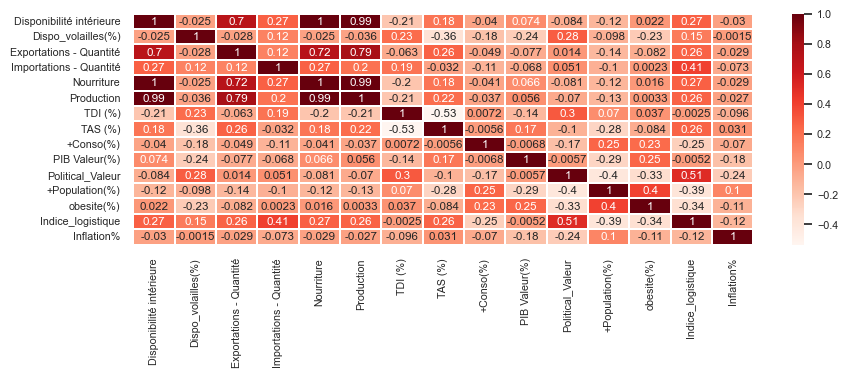

In [ ]:
sns.set(font_scale=0.7)
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(10, 3))
sns.heatmap(corrmat, ax=ax, cmap="Reds", linewidths=0.1, annot=True);

## pearsonr

In [ ]:
from scipy.stats import pearsonr

# Exemple de deux séries de données
x = df2['Disponibilité intérieure']
y = df2['Nourriture']

# Calcul du coefficient de corrélation de Pearson
correlation, p_value = stats.pearsonr(x, y)

alpha = 0.05
if p_value < alpha:
    print("H0 est rejetée : Il y a une corrélation significative entre les variables")
else:
    print("H0 ne peut être rejetée : Il n'y a pas de corrélation significative entre les variables")

print("Coefficient de corrélation de pearsonr :", correlation)
print("Valeur p :", p_value)

H0 est rejetée : Il y a une corrélation significative entre les variables
Coefficient de corrélation de pearsonr : 0.9987193993246978
Valeur p : 2.8378893661922424e-209


In [ ]:
x = df2['Disponibilité intérieure']
y = df2['Production']

correlation, p_value = stats.pearsonr(x, y)

alpha = 0.05
if p_value < alpha:
    print("H0 est rejetée : Il y a une corrélation significative entre les variables")
else:
    print("H0 ne peut être rejetée : Il n'y a pas de corrélation significative entre les variables")

print("Coefficient de corrélation de pearsonr :", correlation)
print("Valeur p :", p_value)

H0 est rejetée : Il y a une corrélation significative entre les variables
Coefficient de corrélation de pearsonr : 0.9883339732659981
Valeur p : 1.0894772311733678e-132


In [ ]:
from scipy.stats import chi2_contingency, chi2

def test_chi2(serie1, serie2):
    alpha = 0.05

    # H0 : les variables sont indépendantes
    tab_contingence = pd.crosstab(serie1, serie2)
    stat_chi2, p, dof, expected_table = chi2_contingency(tab_contingence.values)
    critical = chi2.ppf(1-alpha, dof)

    if p <= alpha:
        print('Variables non indépendantes (H0 rejetée)')
        return False
    else:
        print('Variables indépendantes (H0 accepté)')
        return True

# Test de CHi-2
x = df2['Disponibilité intérieure']
y = df2['Nourriture']
test_chi2(x, y)

Variables non indépendantes (H0 rejetée)


False